## generate the data for the analysis

<Axes: >

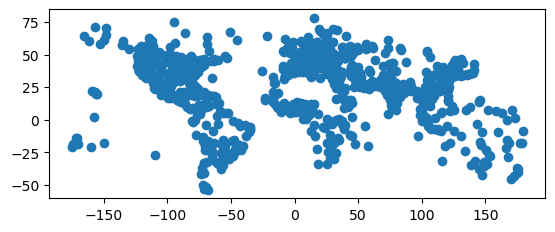

In [70]:
import geopandas as gpd
airports = gpd.read_file("/Users/kang/Downloads/ne_10m_airports.zip")
airports.loc[:,"lon"] = airports.geometry.x
airports.loc[:,"lat"] = airports.geometry.y
airports.plot()

In [65]:
airports.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [66]:
airports.shape

(893, 43)

In [67]:
airports.ne_id.nunique()

893

In [68]:
airports.columns

Index(['scalerank', 'featurecla', 'type', 'name', 'abbrev', 'location',
       'gps_code', 'iata_code', 'wikipedia', 'natlscale', 'comments',
       'wikidataid', 'name_ar', 'name_bn', 'name_de', 'name_en', 'name_es',
       'name_fr', 'name_el', 'name_hi', 'name_hu', 'name_id', 'name_it',
       'name_ja', 'name_ko', 'name_nl', 'name_pl', 'name_pt', 'name_ru',
       'name_sv', 'name_tr', 'name_vi', 'name_zh', 'wdid_score', 'ne_id',
       'name_fa', 'name_he', 'name_uk', 'name_ur', 'name_zht', 'geometry',
       'lon', 'lat'],
      dtype='object')

In [71]:
import random
airports = airports[["ne_id", "name", "lon", "lat"]]
airports.loc[:,"cases"] = random.choices(range(100), k=airports.shape[0])
airports.head()

/var/folders/f0/xl6nrz1n02bd52xdnrwb70w80000gn/T/ipykernel_71281/1346242197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airports.loc[:,"cases"] = random.choices(range(100), k=airports.shape[0])


,ne_id,name,lon,lat,cases
0,1159113785,Sahnewal,75.957072,30.850360,58
1,1159113803,Solapur,75.933060,17.625415,9
2,1159113831,Birsa Munda,85.323597,23.317725,34
3,1159113845,Ahwaz,48.747107,31.343159,42
4,1159113863,Gwalior,78.217219,26.285488,87


In [72]:
## Generate od pairs
import itertools
od_pairs = list(itertools.combinations(airports.ne_id, 2))
len(od_pairs)

398278

In [73]:
import pandas as pd
od_pairs_df = pd.DataFrame(od_pairs, columns=["origin", "destination"])

In [74]:
od_pairs_df = od_pairs_df.merge(airports, left_on="origin", right_on="ne_id")
od_pairs_df = od_pairs_df.merge(airports, left_on="destination", right_on="ne_id", suffixes=["_origin", "_destination"])
od_pairs_df.head()

,origin,destination,ne_id_origin,name_origin,lon_origin,lat_origin,cases_origin,ne_id_destination,name_destination,lon_destination,lat_destination,cases_destination
0,1159113785,1159113803,1159113785,Sahnewal,75.957072,30.850360,58,1159113803,Solapur,75.933060,17.625415,9
1,1159113785,1159113831,1159113785,Sahnewal,75.957072,30.850360,58,1159113831,Birsa Munda,85.323597,23.317725,34
2,1159113803,1159113831,1159113803,Solapur,75.933060,17.625415,9,1159113831,Birsa Munda,85.323597,23.317725,34
3,1159113785,1159113845,1159113785,Sahnewal,75.957072,30.850360,58,1159113845,Ahwaz,48.747107,31.343159,42
4,1159113803,1159113845,1159113803,Solapur,75.933060,17.625415,9,1159113845,Ahwaz,48.747107,31.343159,42


In [23]:
od_pairs_df.columns

Index(['origin', 'destination', 'ne_id_origin', 'name_origin',
       'geometry_origin', 'ne_id_destination', 'name_destination',
       'geometry_destination', 'x_origin', 'y_origin', 'x_destination',
       'y_destination'],
      dtype='object')

In [75]:
od_pairs_df = od_pairs_df[['origin', 'destination', 'lon_origin', 'lat_origin', 'lon_destination', 'lat_destination', 
            'name_origin', 'name_destination' ,'cases_origin', 'cases_destination']]

In [76]:
import random 
od_pairs_df.loc[:, "flow value"] = random.choices(range(1, 100), k = od_pairs_df.shape[0])
od_pairs_df.head()

,origin,destination,lon_origin,lat_origin,lon_destination,lat_destination,name_origin,name_destination,cases_origin,cases_destination,flow value
0,1159113785,1159113803,75.957072,30.850360,75.933060,17.625415,Sahnewal,Solapur,58,9,92
1,1159113785,1159113831,75.957072,30.850360,85.323597,23.317725,Sahnewal,Birsa Munda,58,34,4
2,1159113803,1159113831,75.933060,17.625415,85.323597,23.317725,Solapur,Birsa Munda,9,34,10
3,1159113785,1159113845,75.957072,30.850360,48.747107,31.343159,Sahnewal,Ahwaz,58,42,15
4,1159113803,1159113845,75.933060,17.625415,48.747107,31.343159,Solapur,Ahwaz,9,42,50


<Axes: >

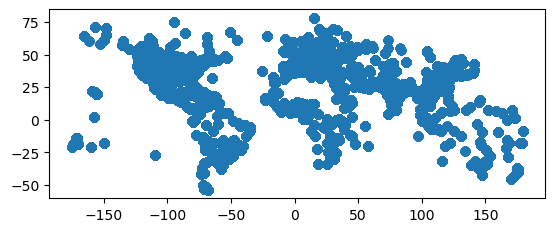

In [77]:
# filter out only destinations is in china 

od_pairs_gdf_dest_china = gpd.GeoDataFrame(od_pairs_df, 
                                           geometry=gpd.points_from_xy(od_pairs_df.lon_destination, od_pairs_df.lat_destination),crs="EPSG:4326")
od_pairs_gdf_dest_china.plot()

In [78]:
od_pairs_gdf_dest_china.shape

(398278, 12)

In [79]:
# read the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

/var/folders/f0/xl6nrz1n02bd52xdnrwb70w80000gn/T/ipykernel_71281/3205139528.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<Axes: >

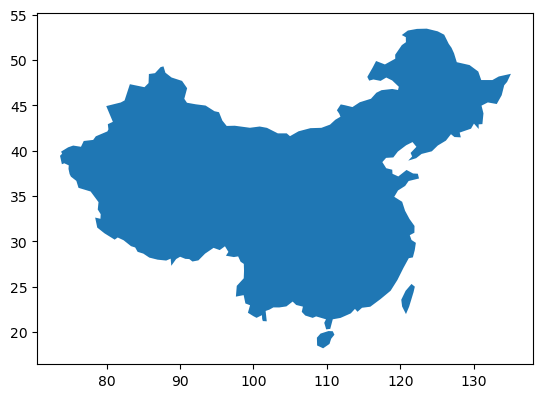

In [80]:
china = world[world.name.map(lambda x: x in ["China", "Taiwan"])]
china.plot()

In [81]:
od_pairs_gdf_dest_china_ = gpd.sjoin(od_pairs_gdf_dest_china, china, op='within')


/opt/homebrew/Caskroom/mambaforge/base/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [85]:
od_pairs_gdf_dest_china_.columns

Index(['origin', 'destination', 'lon_origin', 'lat_origin', 'lon_destination',
       'lat_destination', 'name_origin', 'name_destination', 'cases_origin',
       'cases_destination', 'flow value', 'geometry', 'index_right', 'pop_est',
       'continent', 'name', 'iso_a3', 'gdp_md_est'],
      dtype='object')

In [86]:
od_pairs_gdf_dest_china_.shape

(18121, 18)

<Axes: >

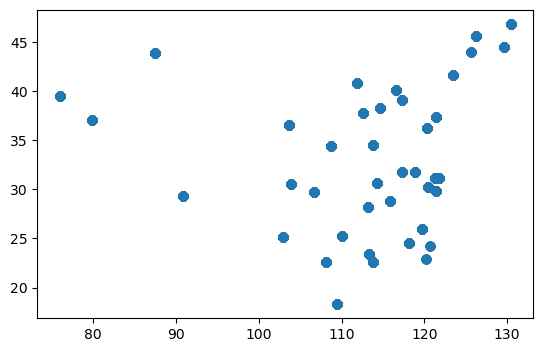

In [87]:
od_pairs_gdf_dest_china_.plot()

In [88]:
od_pairs_gdf_dest_china_[['origin', 'destination', 'lon_origin', 'lat_origin', 'lon_destination',
       'lat_destination', 'name_origin', 'name_destination', 'cases_origin',
       'cases_destination', 'flow value', 'index_right', 'pop_est',
       'continent', 'name', 'iso_a3', 'gdp_md_est']].to_csv("od_pairs.csv", index=False)

In [3]:
import pandas as pd
od_pairs_gdf_dest_china_ = pd.read_csv("od_pairs.csv")
od_pairs_gdf_dest_china_.head()

,origin,destination,lon_origin,lat_origin,lon_destination,lat_destination,name_origin,name_destination,cases_origin,cases_destination,flow value,index_right,pop_est,continent,name,iso_a3,gdp_md_est
0,1159113785,1159114373,75.957072,30.850360,120.209733,22.950668,Sahnewal,Tainan,58,98,68,140,23568378.0,Asia,Taiwan,TWN,1127000
1,1159113803,1159114373,75.933060,17.625415,120.209733,22.950668,Solapur,Tainan,9,98,54,140,23568378.0,Asia,Taiwan,TWN,1127000
2,1159113831,1159114373,85.323597,23.317725,120.209733,22.950668,Birsa Munda,Tainan,34,98,17,140,23568378.0,Asia,Taiwan,TWN,1127000
3,1159113845,1159114373,48.747107,31.343159,120.209733,22.950668,Ahwaz,Tainan,42,98,22,140,23568378.0,Asia,Taiwan,TWN,1127000
4,1159113863,1159114373,78.217219,26.285488,120.209733,22.950668,Gwalior,Tainan,87,98,17,140,23568378.0,Asia,Taiwan,TWN,1127000


In [4]:
od_pairs_gdf_dest_china_.dtypes

origin                 int64
destination            int64
lon_origin           float64
lat_origin           float64
lon_destination      float64
lat_destination      float64
name_origin           object
name_destination      object
cases_origin           int64
cases_destination      int64
flow value             int64
index_right            int64
pop_est              float64
continent             object
name                  object
iso_a3                object
gdp_md_est             int64
dtype: object